# The Spark Foundation-GRIP-Data Science and Business Analytics

# Task-Exploratory Data Analysis : Terrorism 


# Author - Sanjulika Sharma 

IMPORTING LIBRARIES

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Importing the dataset

In [24]:
terrorism_df=pd.read_csv("globalterrorismdb_0718dist.csv")

In [25]:
pd.set_option('display.max_columns',None)

In [26]:
terrorism_df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970000e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970000e+11,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [27]:
terrorism_df.shape

(181691, 135)

In [28]:
pd.set_option('display.max_columns',None)

In [29]:
terrorism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(56), int64(21), object(58)
memory usage: 187.1+ MB


In [30]:
terrorism_df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','success':'Success','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [31]:
terrorism_df.columns

Index(['eventid', 'Year', 'Month', 'Day', 'approxdate', 'extended',
       'resolution', 'country', 'Country', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

# DATA CLEANING

In [32]:
terrorism_df.isnull().sum()

eventid            0
Year               0
Month              0
Day                0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [33]:
#filling null values
terrorism_df['Wounded'] = terrorism_df['Wounded'].fillna(0)
terrorism_df['Killed'] = terrorism_df['Killed'].fillna(0)
terrorism_df['Casualities'] = terrorism_df['Killed'] + terrorism_df['Wounded']
terrorism_df['State'].fillna("unknown", inplace = True)

In [34]:
terrorism_df.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,Region,State,city,latitude,longitude,specificity,vicinity,location,Summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,Success,suicide,attacktype1,AttackType,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,Target_type,targsubtype1,targsubtype1_txt,corp1,Target,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,Group,gsubname,gname2,gsubname2,gname3,gsubname3,Motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,Weapon_type,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,Killed,nkillus,nkillter,Wounded,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,Casualities
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,unknown,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN,1.0
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN,0.0
2,1.970000e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,1.0
3,1.970000e+11,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,0.0,NaN,NaN,0.0,NaN,NaN,

In [35]:
terrorism_df.dropna(axis=1, inplace=True)

In [36]:
terrorism_df

,eventid,Year,Month,Day,extended,country,Country,region,Region,State,vicinity,crit1,crit2,crit3,Success,suicide,attacktype1,AttackType,targtype1,Target_type,Group,individual,weaptype1,Weapon_type,Killed,Wounded,property,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,Casualities
0,1.970000e+11,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,unknown,0,1,1,1,1,0,1,Assassination,14,Private Citizens & Property,MANO-D,0,13,Unknown,1.0,0.0,0,PGIS,0,0,0,0,1.0
1,1.970000e+11,1970,0,0,0,130,Mexico,1,North America,Federal,0,1,1,1,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),23rd of September Communist League,0,13,Unknown,0.0,0.0,0,PGIS,0,1,1,1,0.0
2,1.970000e+11,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,0,1,1,1,1,0,1,Assassination,10,Journalists & Media,Unknown,0,13,Unknown,1.0,0.0,0,PGIS,-9,-9,1,1,1.0
3,1.970000e+11,1970,1,0,0,78,Greece,8,Western Europe,Attica,0,1,1,1,1,0,3,Bombing/Explosion,7,Government (Diplomatic),Unknown,0,6,Explosives,0.0,0.0,1,PGIS,-9,-9,1,1,0.0
4,1.970000e+11,1970,1,0,0,101,Japan,4,East Asia,Fukouka,0,1,1,1,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),Unknown,0,8,Incendiary,0.0,0.0,1,PGIS,-9,-9,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2.020000e+11,2017,12,31,0,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,0,1,1,0,1,0,2,Armed Assault,4,Military,Al-Shabaab,0,5,Firearms,1.0,2.0,-9,START Primary Collection,0,0,0,0,3.0
181687,2.020000e+11,2017,12,31,0,200,Syria,10,Middle East & North Africa,Lattakia,1,1,1,0,1,0,3,Bombing/Explosion,4,Military,Muslim extremists,0,6,Explosives,2.0,7.0,1,START Primary Collection,-9,-9,1,1,9.0
181688,2.020000e+11,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,0,1,1,1,1,0,7,Facility/Infrastructure Attack,14,Private Citizens & Property,Bangsamoro Islamic Freedom Movement (BIFM),0,8,Incendiary,0.0,0.0,1,START Primary Collection,0,0,0,0,0.0
181689,2.020000e+11,2017,12,31,0,92,India,6,South Asia,Manipur,0,1,1,1,0,0,3,Bombing/Explosion,2,Government (General),Unknown,0,6,Explosives,0.0,0.0,-9,START Primary Collection,-9,-9,0,-9,0.0


In [37]:
terrorism_df

,eventid,Year,Month,Day,extended,country,Country,region,Region,State,vicinity,crit1,crit2,crit3,Success,suicide,attacktype1,AttackType,targtype1,Target_type,Group,individual,weaptype1,Weapon_type,Killed,Wounded,property,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,Casualities
0,1.970000e+11,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,unknown,0,1,1,1,1,0,1,Assassination,14,Private Citizens & Property,MANO-D,0,13,Unknown,1.0,0.0,0,PGIS,0,0,0,0,1.0
1,1.970000e+11,1970,0,0,0,130,Mexico,1,North America,Federal,0,1,1,1,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),23rd of September Communist League,0,13,Unknown,0.0,0.0,0,PGIS,0,1,1,1,0.0
2,1.970000e+11,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,0,1,1,1,1,0,1,Assassination,10,Journalists & Media,Unknown,0,13,Unknown,1.0,0.0,0,PGIS,-9,-9,1,1,1.0
3,1.970000e+11,1970,1,0,0,78,Greece,8,Western Europe,Attica,0,1,1,1,1,0,3,Bombing/Explosion,7,Government (Diplomatic),Unknown,0,6,Explosives,0.0,0.0,1,PGIS,-9,-9,1,1,0.0
4,1.970000e+11,1970,1,0,0,101,Japan,4,East Asia,Fukouka,0,1,1,1,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),Unknown,0,8,Incendiary,0.0,0.0,1,PGIS,-9,-9,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2.020000e+11,2017,12,31,0,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,0,1,1,0,1,0,2,Armed Assault,4,Military,Al-Shabaab,0,5,Firearms,1.0,2.0,-9,START Primary Collection,0,0,0,0,3.0
181687,2.020000e+11,2017,12,31,0,200,Syria,10,Middle East & North Africa,Lattakia,1,1,1,0,1,0,3,Bombing/Explosion,4,Military,Muslim extremists,0,6,Explosives,2.0,7.0,1,START Primary Collection,-9,-9,1,1,9.0
181688,2.020000e+11,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,0,1,1,1,1,0,7,Facility/Infrastructure Attack,14,Private Citizens & Property,Bangsamoro Islamic Freedom Movement (BIFM),0,8,Incendiary,0.0,0.0,1,START Primary Collection,0,0,0,0,0.0
181689,2.020000e+11,2017,12,31,0,92,India,6,South Asia,Manipur,0,1,1,1,0,0,3,Bombing/Explosion,2,Government (General),Unknown,0,6,Explosives,0.0,0.0,-9,START Primary Collection,-9,-9,0,-9,0.0


In [38]:
terrorism_df.shape

(181691, 33)

In [39]:
terrorism_df.describe()

,eventid,Year,Month,Day,extended,country,region,vicinity,crit1,crit2,crit3,Success,suicide,attacktype1,targtype1,individual,weaptype1,Killed,Wounded,property,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,Casualities
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.003238e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,0.068297,0.988530,0.993093,0.875668,0.889598,0.036507,3.247547,8.439719,0.002950,6.447325,2.266860,2.883296,-0.544556,-4.543731,-4.464398,0.090010,-3.945952,5.150156
std,1.383523e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,0.284553,0.106483,0.082823,0.329961,0.313391,0.187549,1.915772,6.653838,0.054234,2.173435,11.227057,34.309747,3.122889,4.543547,4.637152,0.568457,4.691325,40.555416
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,0.000000
25%,1.990000e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,3.000000,0.000000,5.000000,0.000000,0.000000,0.000000,-9.000000,-9.000000,0.000000,-9.000000,0.000000
50%,2.010000e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,4.000000,0.000000,6.000000,0.000000,0.000000,1.000000,-9.000000,-9.000000,0.000000,0.000000,1.000000
75%,2.010000e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,14.000000,0.000000,6.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000
max,2.020000e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,22.000000,1.000000,13.000000,1570.000000,8191.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9574.000000


# DATA VISUALIZATION

Text(0.5, 1.0, 'Country wise Attacks')

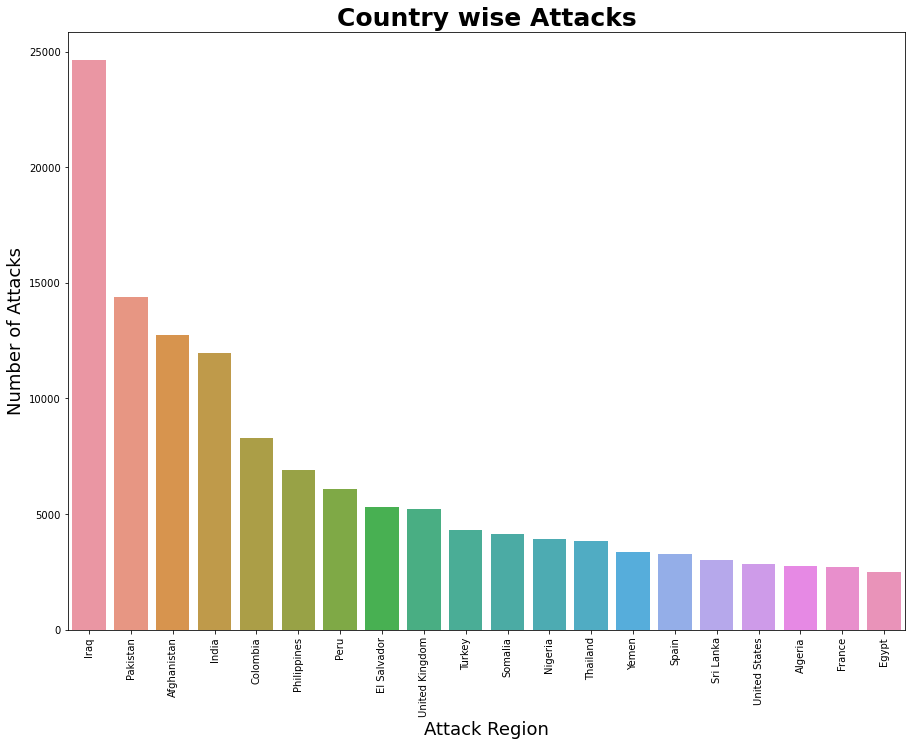

In [40]:
#countrywise attacks visualization 
plt.rcParams["figure.figsize"] = 15, 11
sns.barplot(x = terrorism_df["Country"].value_counts()[:20].index, y=terrorism_df["Country"].value_counts()[:20].values)
plt.ylabel("Number of Attacks", fontsize=18)
plt.xticks(rotation=90)
plt.xlabel("Attack Region", fontsize=18)
plt.title("Country wise Attacks", size=25, fontweight="bold")

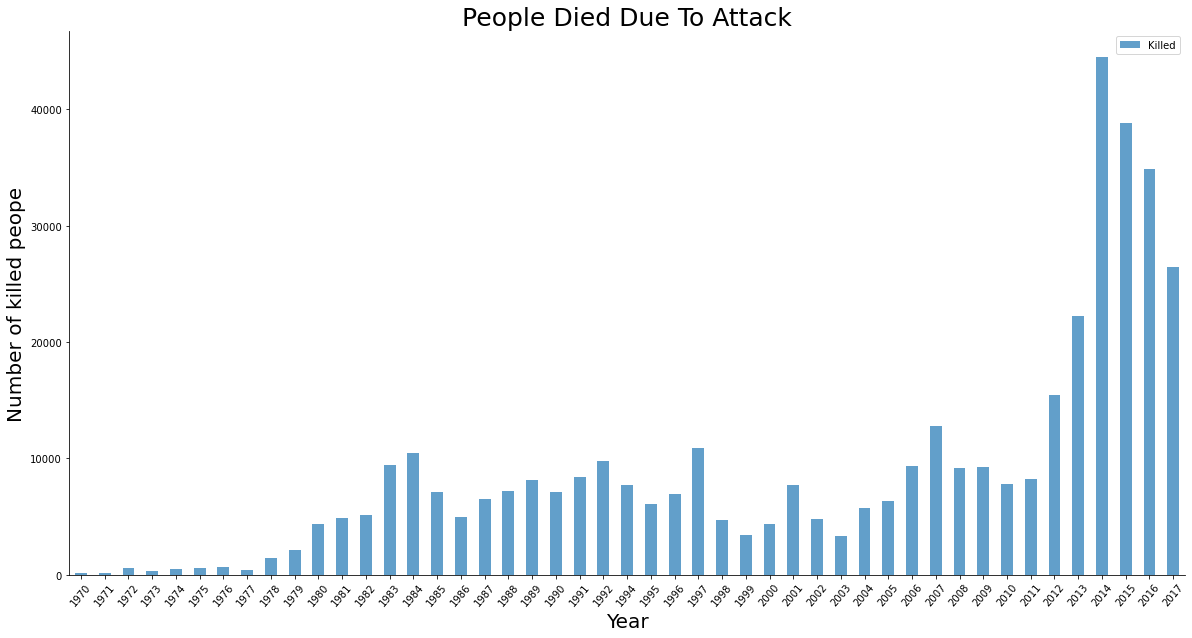

In [41]:
#number of deaths over the years Visualization
df =terrorism_df [['Year','Killed']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
df.plot(kind='bar',alpha=0.7,ax=ax4)
plt.xticks(rotation = 50)
plt.title("People Died Due To Attack",fontsize=25)
plt.ylabel("Number of killed peope",fontsize=20)
plt.xlabel('Year',fontsize=20)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)

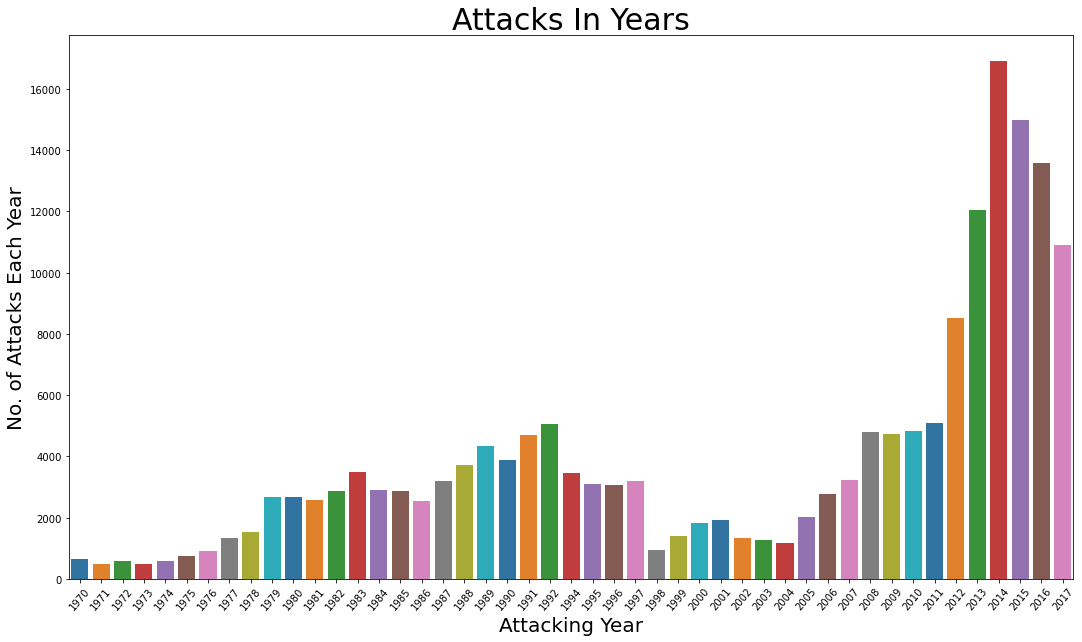

In [42]:
# number of attacks over the years Visualization
year =terrorism_df['Year'].unique()
years_count = terrorism_df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = year,
           y = years_count,
           palette = "tab10")
plt.xticks(rotation = 50)
plt.xlabel('Attacking Year',fontsize=20)
plt.ylabel('No. of Attacks Each Year',fontsize=20)
plt.title('Attacks In Years',fontsize=30)
plt.show()

In [43]:
#Total number of various terror attacks
Killed =terrorism_df.pivot_table(columns='AttackType', values='Killed', aggfunc='sum')
Killed

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Killed,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


In [44]:
#Total number of persons killed by terror attacks per country
countryKill =terrorism_df.pivot_table(columns='Country', values='Killed', aggfunc='sum')
countryKill

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia-Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Costa Rica,Croatia,Cuba,Cyprus,Czech Republic,Czechoslovakia,Democratic Republic of the Congo,Denmark,Djibouti,Dominica,Dominican Republic,East Germany (GDR),East Timor,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Ethiopia,Falkland Islands,Fiji,Finland,France,French Guiana,French Polynesia,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Grenada,Guadeloupe,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hong Kong,Hungary,Iceland,India,Indonesia,International,Iran,Iraq,Ireland,Israel,Italy,Ivory Coast,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kosovo,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Lesotho,Liberia,Libya,Lithuania,Luxembourg,Macau,Macedonia,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Martinique,Mauritania,Mauritius,Mexico,Moldova,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nepal,Netherlands,New Caledonia,New Hebrides,New Zealand,Nicaragua,Niger,Nigeria,North Korea,North Yemen,Norway,Pakistan,Panama,Papua New Guinea,Paraguay,People's Republic of the Congo,Peru,Philippines,Poland,Portugal,Qatar,Republic of the Congo,Rhodesia,Romania,Russia,Rwanda,Saudi Arabia,Senegal,Serbia,Serbia-Montenegro,Seychelles,Sierra Leone,Singapore,Slovak Republic,Slovenia,Solomon Islands,Somalia,South Africa,South Korea,South Sudan,South Vietnam,South Yemen,Soviet Union,Spain,Sri Lanka,St. Kitts and Nevis,St. Lucia,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Vatican City,Venezuela,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
Killed,39384.0,42.0,11066.0,0.0,3043.0,0.0,490.0,37.0,23.0,30.0,258.0,1.0,44.0,1244.0,76.0,14.0,79.0,3.0,0.0,9.0,42.0,79.0,11.0,203.0,0.0,28.0,134.0,4205.0,543.0,2347.0,365.0,1990.0,1119.0,228.0,1008.0,14698.0,1.0,17.0,248.0,8.0,45.0,6.0,27.0,4069.0,5.0,274.0,3.0,34.0,2.0,9.0,54.0,3869.0,12053.0,2.0,46.0,3.0,1765.0,0.0,8.0,11.0,534.0,1.0,0.0,6.0,13.0,278.0,84.0,19.0,325.0,9.0,8.0,5167.0,213.0,17.0,41.0,336.0,307.0,4.0,6.0,0.0,19341.0,1238.0,1.0,1673.0,78589.0,117.0,1703.0,420.0,268.0,42.0,66.0,133.0,39.0,1948.0,83.0,63.0,10.0,27.0,2.0,4061.0,46.0,177.0,2598.0,1.0,0.0,1.0,49.0,31.0,33.0,152.0,20.0,1432.0,5.0,0.0,43.0,0.0,780.0,13.0,1.0,292.0,2711.0,1280.0,220.0,1969.0,37.0,35.0,0.0,1.0,10598.0,1474.0,22682.0,3.0,3.0,79.0,23822.0,38.0,79.0,59.0,15.0,12771.0,9559.0,9.0,32.0,7.0,182.0,217.0,4.0,4308.0,3236.0,672.0,325.0,3.0,3.0,0.0,840.0,5.0,7.0,1.0,4.0,10273.0,2674.0,10.0,2634.0,81.0,0.0,96.0,1288.0,15530.0,0.0,2.0,3883.0,29.0,6.0,22.0,74.0,15229.0,60.0,307.0,73.0,2742.0,76.0,6.0,351.0,6888.0,3.0,3065.0,2261.0,123.0,3410.0,3771.0,6.0,68.0,0.0,0.0,227.0,1.0,0.0,1500.0,97.0,1.0,8776.0,119.0,324.0,70.0,154.0


RESULT

Country with the most attacks: Iraq

City with the most attacks: Baghdad

Region with the most attacks: Middle East & North Africa